## Hyperparameter Tuning Process:

## RFE----Hyperparameter Tuning Process[Logistic Regression]

In [2]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize the logistic regression model
estimator = LogisticRegression()

# Perform Recursive Feature Elimination (RFE) with logistic regression
# Here, we'll select the top 5 features
rfe = RFE(estimator, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nSelected Features:")
print(selected_features_rfe)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Initialize logistic regression model with the selected features
final_estimator = LogisticRegression()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=final_estimator, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest Parameters found by Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print precision, recall, and F1-score for the best model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features:
['sex', 'exang', 'slope', 'ca', 'thal']

Best Parameters found by Grid Search:
{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

Best Cross-validation Accuracy: 0.81

Accuracy on test set with best model: 0.80

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.73      0.79       102
           1       0.76      0.88      0.82       103

    accuracy                           0.80       205
   macro avg       0.81      0.80      0.80       205
weighted avg       0.81      0.80      0.80       205



## RFE----Hyperparameter Tuning Process[Random Forest]

In [11]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize the Random Forest classifier
estimator_rf = RandomForestClassifier()

# Perform Recursive Feature Elimination (RFE) with Random Forest
# Here, we'll select the top 5 features
rfe = RFE(estimator_rf, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nSelected Features:")
print(selected_features_rfe)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model with the selected features
final_estimator = RandomForestClassifier()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=final_estimator, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest Parameters found by Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print precision, recall, and F1-score for the best model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features:
['age', 'cp', 'thalach', 'oldpeak', 'thal']

Best Parameters found by Grid Search:
{'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Best Cross-validation Accuracy: 0.98

Accuracy on test set with best model: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## RFE----Hyperparameter Tuning Process[AdaBoost]

In [10]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize the AdaBoost classifier
estimator = AdaBoostClassifier()

# Perform Recursive Feature Elimination (RFE) with AdaBoost classifier
# Here, we'll select the top 5 features
rfe = RFE(estimator, n_features_to_select=5)
X_selected = rfe.fit_transform(X, y)

# Get the selected feature names
selected_features_rfe = X.columns[rfe.support_].tolist()
print("\nSelected Features:")
print(selected_features_rfe)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.5, 1.0]
}

# Initialize AdaBoost model with the selected features
final_estimator = AdaBoostClassifier()

# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=final_estimator, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("\nBest Parameters found by Grid Search:")
print(grid_search.best_params_)
print("\nBest Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Predict on the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the best model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print precision, recall, and F1-score for the best model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features:
['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

Best Parameters found by Grid Search:
{'learning_rate': 1.0, 'n_estimators': 300}

Best Cross-validation Accuracy: 0.85

Accuracy on test set with best model: 0.81

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       102
           1       0.82      0.81      0.81       103

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



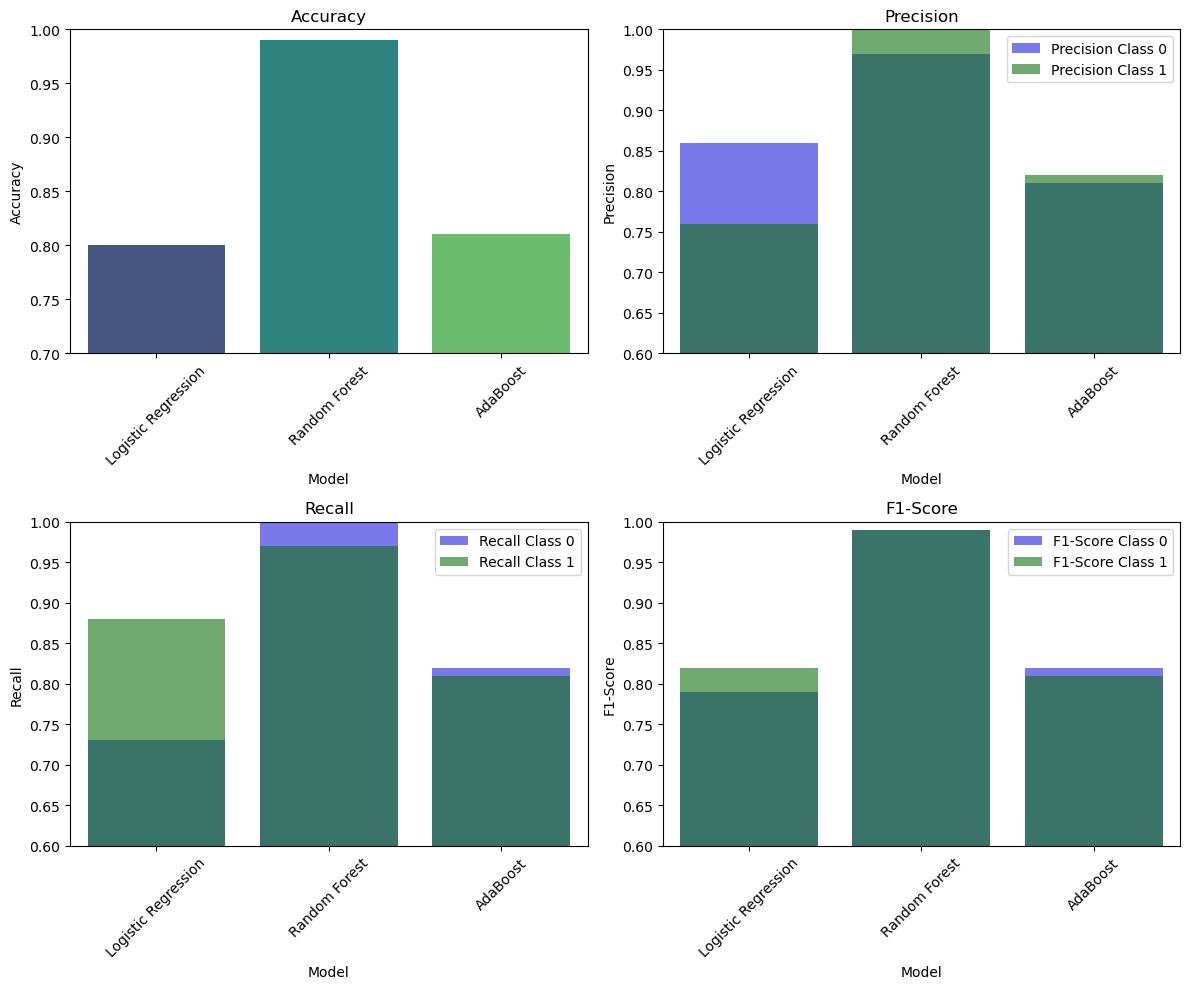

In [12]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Define the results manually
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Random Forest", "AdaBoost"],
    "Best CV Accuracy": [0.81, 0.98, 0.85],
    "Test Set Accuracy": [0.80, 0.99, 0.81],
    "Precision_0": [0.86, 0.97, 0.81],
    "Precision_1": [0.76, 1.00, 0.82],
    "Recall_0": [0.73, 1.00, 0.82],
    "Recall_1": [0.88, 0.97, 0.81],
    "F1_Score_0": [0.79, 0.99, 0.82],
    "F1_Score_1": [0.82, 0.99, 0.81]
})

# Visualization
plt.figure(figsize=(12, 10))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x="Model", y="Test Set Accuracy", data=results, palette="viridis")
plt.title('Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Precision_0", data=results, color='blue', label='Precision Class 0', alpha=0.6)
sns.barplot(x="Model", y="Precision_1", data=results, color='green', label='Precision Class 1', alpha=0.6)
plt.title('Precision')
plt.xlabel('Model')
plt.ylabel('Precision')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend()

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Recall_0", data=results, color='blue', label='Recall Class 0', alpha=0.6)
sns.barplot(x="Model", y="Recall_1", data=results, color='green', label='Recall Class 1', alpha=0.6)
plt.title('Recall')
plt.xlabel('Model')
plt.ylabel('Recall')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend()

# F1-Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="F1_Score_0", data=results, color='blue', label='F1-Score Class 0', alpha=0.6)
sns.barplot(x="Model", y="F1_Score_1", data=results, color='green', label='F1-Score Class 1', alpha=0.6)
plt.title('F1-Score')
plt.xlabel('Model')
plt.ylabel('F1-Score')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


## Pearson -----Hyperparameter Tuning[Logistic Regression]

In [13]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Select the top 5 features based on Pearson correlation coefficient
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_pearson = X.columns[selector.get_support()].tolist()
print("\nSelected Features based on Pearson Correlation Coefficient:")
print(selected_features_pearson)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize logistic regression model with the selected features
log_reg = LogisticRegression()

# Define the grid of parameters to search over
param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'solver': ['liblinear', 'saga']
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features based on Pearson Correlation Coefficient:
['cp', 'thalach', 'exang', 'oldpeak', 'ca']
Fitting 5 folds for each of 28 candidates, totalling 140 fits

Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Cross-validation Accuracy: 0.83

Accuracy on test set with best model: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.70      0.76       102
           1       0.74      0.87      0.80       103

    accuracy                           0.79       205
   macro avg       0.79      0.78      0.78       205
weighted avg       0.79      0.79      0.78       205



## Pearson -----Hyperparameter Tuning[Random Forest]

In [14]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Select the top 5 features based on Pearson correlation coefficient
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_pearson = X.columns[selector.get_support()].tolist()
print("\nSelected Features based on Pearson Correlation Coefficient:")
print(selected_features_pearson)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier with default hyperparameters
rf_classifier = RandomForestClassifier(random_state=42)

# Define the grid of parameters to search over
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_rf_model = grid_search.best_estimator_
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features based on Pearson Correlation Coefficient:
['cp', 'thalach', 'exang', 'oldpeak', 'ca']
Fitting 5 folds for each of 360 candidates, totalling 1800 fits

Best Parameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best Cross-validation Accuracy: 0.97

Accuracy on test set with best model: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       102
           1       0.99      0.97      0.98       103

    accuracy                           0.98       205
   macro avg       0.98      0.98      0.98       205
weighted avg       0.98      0.98      0.98       205



## Pearson -----Hyperparameter Tuning[AdaBoost]

In [15]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Select the top 5 features based on Pearson correlation coefficient
selector = SelectKBest(score_func=f_classif, k=5)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features_pearson = X.columns[selector.get_support()].tolist()
print("\nSelected Features based on Pearson Correlation Coefficient:")
print(selected_features_pearson)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Initialize AdaBoost classifier with default hyperparameters
adaboost_classifier = AdaBoostClassifier(random_state=42)

# Define the grid of parameters to search over
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.1, 1.0, 10.0]
}

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=adaboost_classifier, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit the GridSearchCV to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and the corresponding score
print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best Cross-validation Accuracy: {grid_search.best_score_:.2f}")

# Evaluate the best model on the test set
best_adaboost_model = grid_search.best_estimator_
y_pred = best_adaboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Selected Features based on Pearson Correlation Coefficient:
['cp', 'thalach', 'exang', 'oldpeak', 'ca']
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Best Parameters: {'learning_rate': 1.0, 'n_estimators': 300}
Best Cross-validation Accuracy: 0.84

Accuracy on test set with best model: 0.83

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       102
           1       0.83      0.83      0.83       103

    accuracy                           0.83       205
   macro avg       0.83      0.83      0.83       205
weighted avg       0.83      0.83      0.83       205



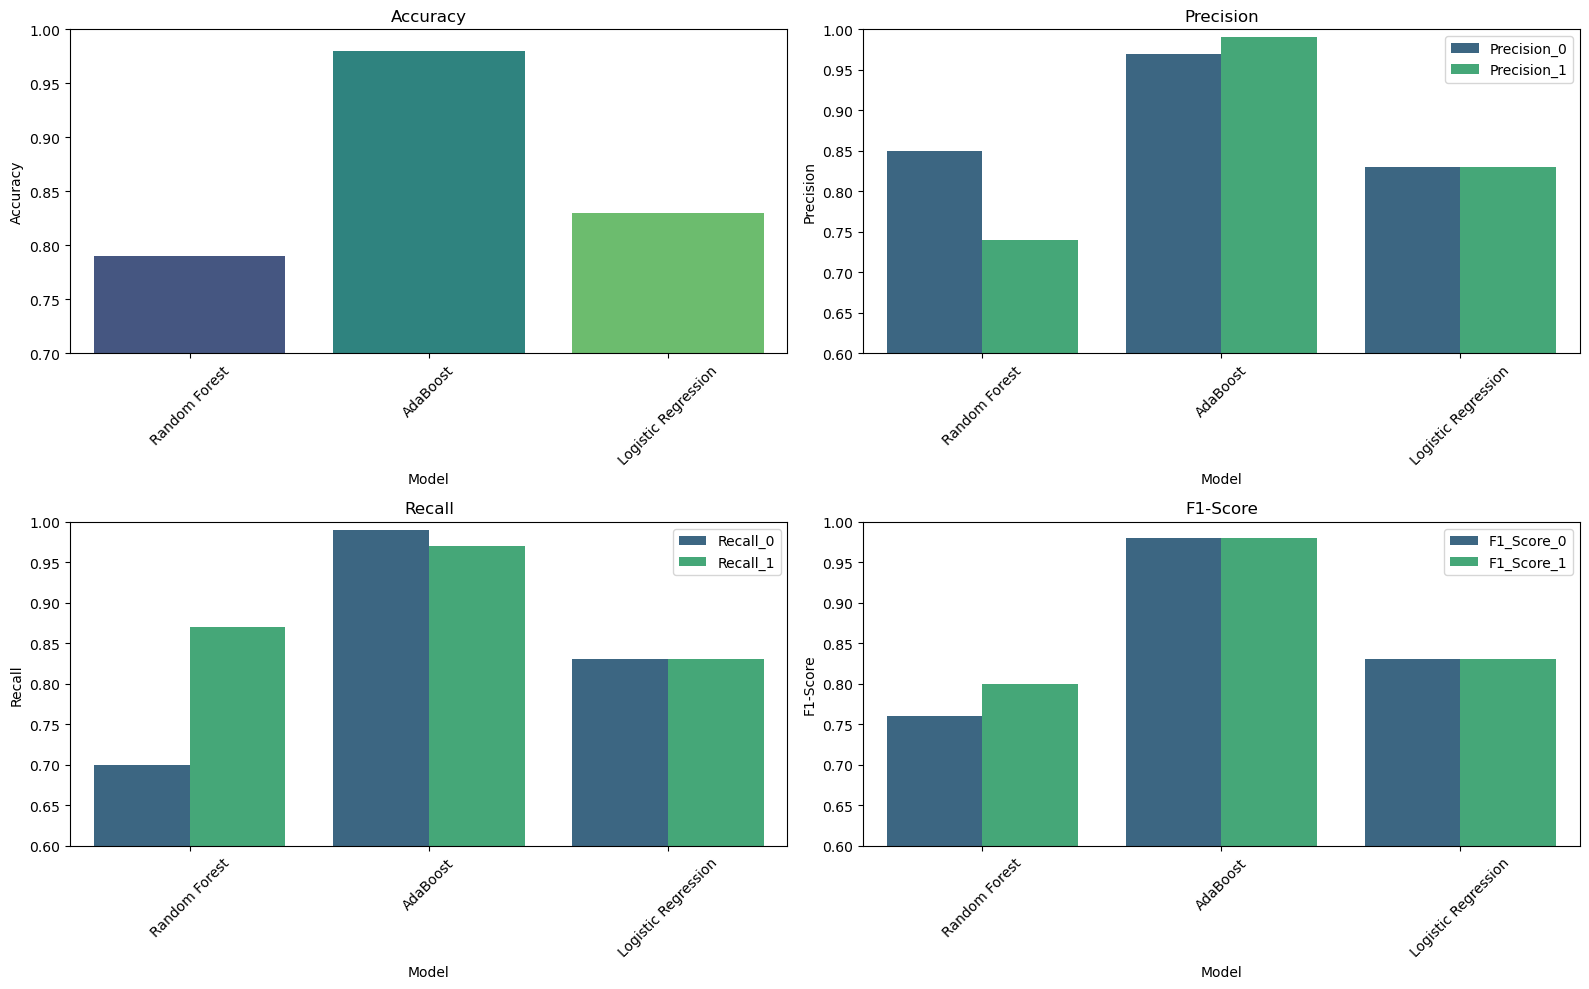

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Data from the classification reports
data = {
    'Model': ['Random Forest', 'AdaBoost', 'Logistic Regression'],
    'Accuracy': [0.79, 0.98, 0.83],
    'Precision_0': [0.85, 0.97, 0.83],
    'Recall_0': [0.70, 0.99, 0.83],
    'F1_Score_0': [0.76, 0.98, 0.83],
    'Precision_1': [0.74, 0.99, 0.83],
    'Recall_1': [0.87, 0.97, 0.83],
    'F1_Score_1': [0.80, 0.98, 0.83]
}

# Create a DataFrame
results_df = pd.DataFrame(data)

# Melt the DataFrame to use with seaborn
results_melted = pd.melt(results_df, id_vars=['Model'], var_name='Metric', value_name='Score')

# Set up the plots
plt.figure(figsize=(16, 10))

# Accuracy Plot
plt.subplot(2, 2, 1)
sns.barplot(x='Model', y='Accuracy', data=results_df, palette='viridis')
plt.title('Accuracy')
plt.ylim(0.7, 1.0)  # Adjust the y-axis limits if needed
plt.ylabel('Accuracy')
plt.xticks(rotation=45)

# Precision Plot
plt.subplot(2, 2, 2)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('Precision')],
            palette="viridis")
plt.title('Precision')
plt.ylabel('Precision')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# Recall Plot
plt.subplot(2, 2, 3)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('Recall')],
            palette="viridis")
plt.title('Recall')
plt.ylabel('Recall')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper right')

# F1-Score Plot
plt.subplot(2, 2, 4)
sns.barplot(x="Model", y="Score", hue="Metric", data=results_melted[results_melted['Metric'].str.contains('F1_Score')],
            palette="viridis")
plt.title('F1-Score')
plt.ylabel('F1-Score')
plt.ylim(0.6, 1.0)  # Adjust the y-axis limits if needed
plt.xticks(rotation=45)
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


## Embedded Random Classifier-----Hyperparameter Tuning[Logistic Regression]

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize Random Forest Classifier
rf = RandomForestClassifier(random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Best Parameters found by Grid Search:
{'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Cross-validation Accuracy: 0.98

Accuracy on test set with best model: 0.99

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



## Embedded Random Classifier-----Hyperparameter Tuning[Random Forest]

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize Random Forest Classifier with default hyperparameters
rf = RandomForestClassifier(random_state=42)

# Fit the Random Forest model to perform embedded feature selection
rf.fit(X, y)

# Get feature importance scores
feature_importances = rf.feature_importances_

# Get the indices of the top k most important features
k = 5  # Number of selected features
top_indices = feature_importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features_rf = X.columns[top_indices].tolist()
print("Selected Features:")
print(selected_features_rf)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features_rf]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_rf = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
y_pred = best_rf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Selected Features:
['cp', 'thalach', 'ca', 'oldpeak', 'thal']


## Embedded Random Classifier-----Hyperparameter Tuning[AdaBoost]

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# Load and display the heart dataset from a CSV file
df = pd.read_csv("heart_dataset.csv")

# Separate features (X) and target (y)
X = df.drop('target', axis=1)  # Assuming 'target' is the column name of the target variable
y = df['target']

# Initialize AdaBoost Classifier with default hyperparameters
ab = AdaBoostClassifier(random_state=42)

# Fit the AdaBoost model to perform embedded feature selection
ab.fit(X, y)

# Get feature importance scores
feature_importances = ab.feature_importances_

# Get the indices of the top k most important features
k = 5  # Number of selected features
top_indices = feature_importances.argsort()[-k:][::-1]

# Get the names of the selected features
selected_features_ab = X.columns[top_indices].tolist()
print("Selected Features:")
print(selected_features_ab)

# Filter the dataset to keep only the selected features
X_selected = X[selected_features_ab]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(estimator=ab, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best model from grid search
best_ab = grid_search.best_estimator_

# Print the best parameters and the best score
print("Best Parameters found by Grid Search:")
print(grid_search.best_params_)
print("Best Cross-validation Accuracy: {:.2f}".format(grid_search.best_score_))

# Evaluate the best model on the test set
y_pred = best_ab.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on test set with best model: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
